In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import random as rand
import numpy as np
%matplotlib

Using matplotlib backend: <object object at 0x7f31f0135960>


In [3]:
fig = plt.figure(figsize=[6,6])
ax = fig.add_subplot(111,projection='3d')

In [4]:
xGrad = 5
yGrad = 7
noiseSD = .05

x=[]
y=[]
z=[]

for i in range(100):
    xItem = rand.randint(1,200)
    yItem = rand.randint(1,200)
    x.append(xItem)
    y.append(yItem)
    noise = np.random.normal(0,scale=50.0)
    z.append((xItem*xGrad)+(yItem*yGrad)+noise)

In [5]:
ax.scatter(x,y,z,c='r',marker='o')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

fig.show()

In [8]:
%matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA

Using matplotlib backend: agg


In [9]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [10]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [12]:
plt.gray()
plt.matshow(digits.images[0])
plt.show()

In [13]:
pca = PCA(3)
projected = pca.fit_transform(digits.data)

In [14]:
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 3)


In [15]:
projected

array([[ -1.25946688,  21.27488535,  -9.46305359],
       [  7.95760895, -20.76868876,   4.43951124],
       [  6.99192489,  -9.95599556,   2.95855396],
       ...,
       [ 10.80128492,  -6.96025449,   5.5995544 ],
       [ -4.87210073,  12.42395757, -10.1708641 ],
       [ -0.34438691,   6.36553913,  10.77370382]])

In [16]:
x = projected[:,0]
y = projected[:,1]
z = projected[:,2]

In [17]:
fig2 = plt.figure(figsize=(6,6))
ax2 = fig2.add_subplot(111,projection='3d')

In [18]:
ax2.scatter(x,y,z,c=digits.target,cmap=plt.cm.get_cmap('Spectral',10))
ax2.set_xlabel('X Label')
ax2.set_ylabel('Y Label')
ax2.set_zlabel('Z Label')

fig2.show()

In [19]:
pca = PCA(2)
projected = pca.fit_transform(digits.data)

In [25]:
plt.figure(figsize=(8,8))
plt.scatter(projected[:,0],projected[:,1],c= digits.target, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('Spectral',10))

plt.xlabel('component 1')
plt.ylabel('component 2')

plt.rcParams['axes.grid'] = False

plt.colorbar();

array([0.14890594, 0.28509365, 0.40303959, 0.48713938, 0.54496353,
       0.59413263, 0.6372925 , 0.67390623, 0.70743871, 0.73822677,
       0.76195018, 0.78467714, 0.80289578, 0.82063433, 0.83530534,
       0.84940249, 0.86258838, 0.87506976, 0.88524694, 0.89430312,
       0.9031985 , 0.91116973, 0.91884467, 0.9260737 , 0.93303259,
       0.9389934 , 0.94474955, 0.94990113, 0.95479652, 0.9590854 ,
       0.96282146, 0.96635421, 0.96972105, 0.97300135, 0.97608455,
       0.97902234, 0.98158823, 0.98386565, 0.98608843, 0.98820273,
       0.99010182, 0.99168835, 0.99319995, 0.99460574, 0.99577196,
       0.99684689, 0.99781094, 0.99858557, 0.99914278, 0.99954711,
       0.99975703, 0.99983951, 0.99989203, 0.99994255, 0.99997555,
       0.99998798, 0.99999503, 0.99999804, 0.99999911, 0.99999966,
       1.        , 1.        , 1.        , 1.        ])

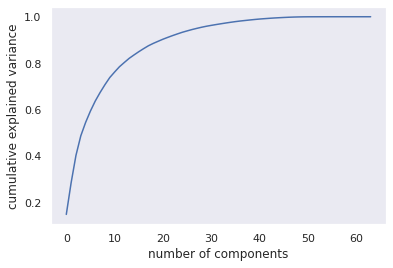

In [26]:
%matplotlib inline
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
np.cumsum(pca.explained_variance_ratio_)

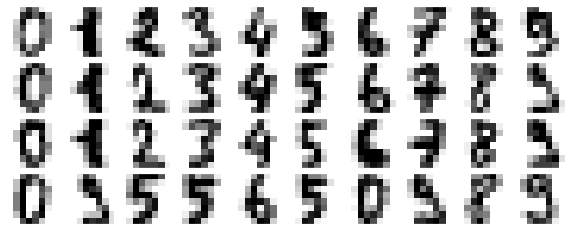

In [27]:
%matplotlib inline
def plot_digits(data):
    fig,axes = plt.subplots(4,10,figsize=(10,4),
                            subplot_kw={'xticks':[],'yticks':[]},
                            gridspec_kw=dict(hspace=0.1,wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8),cmap='binary',interpolation='nearest',clim=(0,16))
plot_digits(digits.data)
    

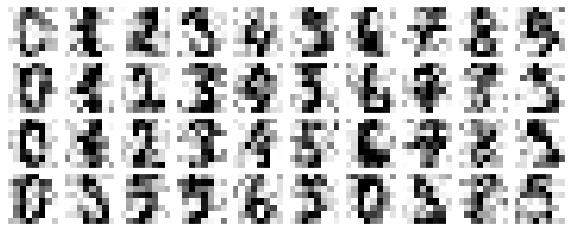

In [29]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [30]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

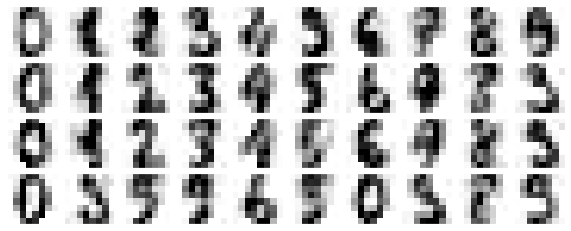

In [32]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

In [34]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [36]:
from sklearn.decomposition import PCA as RandomizedPCA

pca = RandomizedPCA(150, svd_solver='randomized')
pca.fit(faces.data)

PCA(n_components=150, svd_solver='randomized')

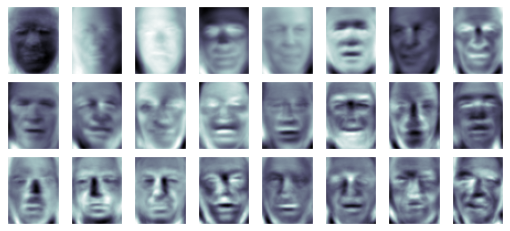

In [38]:
fig, axes = plt.subplots(3,8,figsize=(9,4),
                        subplot_kw={'xticks':[],'yticks':[]},
                        gridspec_kw=dict(hspace=0.1,wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62,47),cmap='bone')

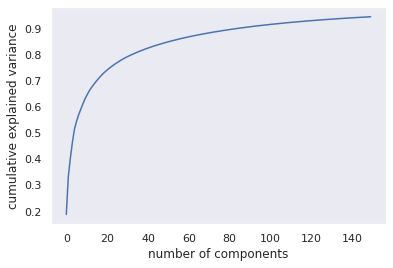

In [39]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
pca = RandomizedPCA(90).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

In [ ]:
fig, ax = plt.subplots(2,10, figsize=(10,2.5),
                      subplot_kw={'xticks':[],'yticks':[]},girdspec_kw=dict(hspace=0.1,wspace=0.1))
for i in range(10):
    ax[0,i].imshow(faces.data[i].reshape(62,47),cmap='binary_r')
    ax[1,i].imshow(faces.data[i].reshape(62,47),cmap='binary_r')

ax[0,0].set_ylabel('full-dim\ninput')
ax[1,0].set_ylabel('150-dim\nreconstruction')